In [39]:
import pandas as pd
import numpy as np
import re
import tqdm
from matplotlib import  pyplot as plt 


In [2]:
import nltk
from nltk import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\EMZ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\EMZ\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
df_dialect=pd.read_csv("C:\\Users\\EMZ\\Desktop\\JeelAIDM\\NLP\\selected_dialects.csv", encoding = "utf-8")

In [4]:
df_dialect.head(3)

,dialect,clean_text,no_stopw
0,EG,الاقيش معاك الف يا عم نجيب قرض حسن ابدا بيهم ...,الاقيش معاك الف عم نجيب قرض حسن ابدا بيهم حلمي...
1,EG,وهو انت لو بتفهم كنت بقيت زملكاوي,انت بتفهم بقيت زملكاوي
2,EG,ولولوا عليك ساعة وسكتوا,ولولوا ساعة وسكتوا


In [13]:
df_dialect.isnull().sum()

dialect       0
clean_text    0
no_stopw      7
dtype: int64

In [15]:
df_dialect.dropna()

,dialect,clean_text,no_stopw
0,EG,الاقيش معاك الف يا عم نجيب قرض حسن ابدا بيهم ...,الاقيش معاك الف عم نجيب قرض حسن ابدا بيهم حلمي...
1,EG,وهو انت لو بتفهم كنت بقيت زملكاوي,انت بتفهم بقيت زملكاوي
2,EG,ولولوا عليك ساعة وسكتوا,ولولوا ساعة وسكتوا
3,EG,لا ساعة واحدة عشان بواب ملكش عازة,ساعة واحدة بواب ملكش عازة
4,EG,جنسيتك ايه ده انت لو صهيوني مش هتقول كدة,جنسيتك ايه انت صهيوني هتقول كدة
...,...,...,...
29995,MA,ان شاء الله وبالتوفيق للكل,ان شاء الله وبالتوفيق للكل
29996,MA,ادري عيوني مايهمك سهرها ياميت الاحساس تصبح على...,ادري عيوني مايهمك سهرها ياميت الاحساس تصبح خير...
29997,MA,المغرب مصر غاناالله يخرب بيوتكو انا ماكنتش اعر...,المغرب مصر غاناالله يخرب بيوتكو انا ماكنتش اعر...
29998,MA,اخيب حاجة ممكن تحس بيها هيا في بعض الحالات وال...,اخيب حاجة تحس الحالات والمواقف مني تتكلم تندم ...


In [18]:
df_dialect['clean_text'] = df_dialect['clean_text'].apply(lambda x: re.sub(r'(.)\1+', r'\1\1',x)) #remove longation
df_dialect['no_stopw'] = df_dialect['no_stopw'].apply(lambda x: re.sub(r'(.)\1+', r'\1\1',x)) #remove longation


TypeError: expected string or bytes-like object

In [19]:
my_stop =  ['أن','أنا','أنت','أنتم','أنه','أهلا','أو','بس','و','إذا','إلى','احد','هم','هو','هي','من','في','على','لما','حتى','انت','او','مع','من','فى','او','ان','انا','انت','انتم','شاء','فى','اهلا','الله','هه']

In [ ]:
stop_words = stopwords.words('arabic')

In [20]:
file=open("C:\\Users\\EMZ\\Desktop\\JeelAIDM\\NLP\\dialectal_stopwords_405.txt",'r')

In [21]:
file_content=file.read()

In [22]:
stop_words2=file_content.split("\n")

In [24]:
newstop = my_stop + stop_words2

In [25]:
df_dialect['wto_stopw']= df_dialect['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (newstop)]))

In [26]:
df_dialect.sample(4)

,dialect,clean_text,no_stopw,wto_stopw
28046,MA,مع احترامي لسوهاب ممكن تدعموه وتصوتو وتطلبوه ...,احترامي لسوهاب تدعموه وتصوتو وتطلبوه فالبرامج ...,احترامي لسوهاب ممكن تدعموه وتصوتو وتطلبوه فالب...
25783,MA,ايوا جي سطاسيوني حدا اختك ونشرو واحد الدلاحة...,ايوا جي سطاسيوني اختك ونشرو الدلاحة كبيييييرة ...,ايوا جي سطاسيوني حدا اختك ونشرو واحد الدلاحة ك...
17282,SA,شوفوا اول مرة نطيح فيها النار من قدامك ومن ورا...,شوفوا اول مرة نطيح النار وراك ان فزت الاتحاد ب...,شوفوا اول مرة نطيح فيها النار قدامك ومن وراك ف...
3545,EG,اتعلمى حاجة بقى شايفة العيال اللى تشرف,اتعلمى حاجة شايفة العيال اللى تشرف,اتعلمى حاجة بقى شايفة العيال اللى تشرف


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()


In [28]:
X = vectorizer.fit_transform(df_dialect["wto_stopw"])

In [30]:
X2 = vectorizer.fit_transform(df_dialect["clean_text"])

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,df_dialect["dialect"],test_size=0.2,random_state=42)

In [32]:
from sklearn.svm import SVC 

base_line_model= SVC(kernel='rbf').fit(X_train,y_train)

In [33]:
y_pred= base_line_model.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(y_test,y_pred)

0.8526666666666667

In [36]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0,5)):
  
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, '-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, '-', color="g",
             label="Cross-validation score")

    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left');
    return plt

In [37]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.model_selection import validation_curve




def summarize_model_result(model, model_name, X_train, X_test, y_train, y_test, cv ):

  y_pred = model.predict(X_test)

  test_accuracy = accuracy_score(y_test, y_pred)
  print("\n testing accuracy :  "  ,test_accuracy,"\n")
  print("----------------------------------------------------------------------------------------------")

 
  print(classification_report(y_test, y_pred))

  # print Confusion Matrix
  print('\nConfusion Matrix:\n')
  plot_confusion_matrix(model, X_test, y_test, xticks_rotation='vertical')
 
  plot_learning_curve(model,"Learning Curve of "+ model_name,X_train, y_train, ylim=(0, 1.1), cv=cv, n_jobs=8)

  print("----------------------------------------------------------------------------------------------")


 testing accuracy :   0.8526666666666667 

----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

          EG       0.90      0.85      0.88      2002
          MA       0.92      0.76      0.83      2002
          SA       0.77      0.95      0.85      1996

    accuracy                           0.85      6000
   macro avg       0.86      0.85      0.85      6000
weighted avg       0.86      0.85      0.85      6000


Confusion Matrix:



C:\Users\EMZ\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


----------------------------------------------------------------------------------------------


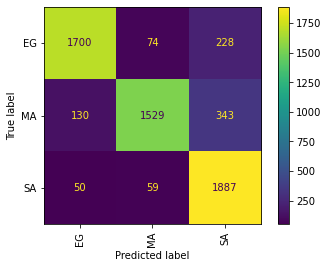

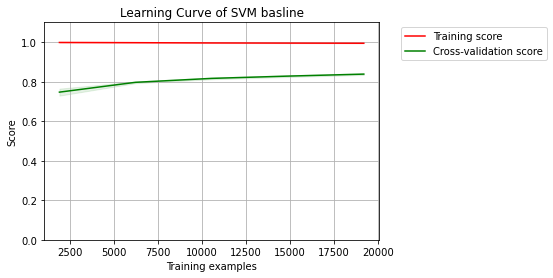

In [40]:
summarize_model_result(base_line_model, "SVM basline", X_train, X_test, y_train, y_test, 5 )

In [42]:
from sklearn.model_selection import validation_curve


# Setting the range for the parameter (from 1 to 10)
parameter_range = np.logspace(-6, -1, 5)

# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
train_score, test_score = validation_curve(SVC(kernel="linear"), X, df_dialect['dialect'],
									param_name = "gamma",
									param_range = parameter_range,
										cv = 5, scoring = "accuracy")

train_scores_mean = np.mean(train_score, axis=1)
train_scores_std = np.std(train_score, axis=1)
test_scores_mean = np.mean(test_score, axis=1)
test_scores_std = np.std(test_score, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.xticks(np.arange(1,10))
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(
    parameter_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    parameter_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.semilogx(
    parameter_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
plt.fill_between(
    parameter_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.show()

KeyboardInterrupt: 